In [2]:
import pandas as pd #tablas https://pandas.pydata.org/docs/user_guide/pyarrow.html
import numpy as np #estadistica https://numpy.org/doc/1.25/user/index.html#user
import matplotlib.pyplot as plt #gráficos https://matplotlib.org/stable/plot_types/index.html
import seaborn as sns #gráficos https://seaborn.pydata.org/tutorial/regression.html
from sklearn import linear_model #modelo de regresion https://scikit-learn.org/stable/

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [3]:
df = pd.read_csv('marketing_customer_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
(df["Income"] == 0).sum()
#LET'S CLEAN THE DATA

2317

In [5]:
#Substitute 0 by the median of income without the values that are 0
df["Income"] = df["Income"].replace(0, df[df["Income"] != 0]["Income"].median())
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,48081,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,48081,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,48081,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [7]:
#EXPORT TO CSV. AS FILE WITH ALL DATA COMPLETE RAW
df.to_csv("complete_raw.csv", index=False) 

In [8]:
numerical_columns= df.select_dtypes(include=[np.number])
numerical_columns.describe()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.00000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,49853.97263,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,21023.08271,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,10037.00000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,34337.00000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,48081.00000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.00000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.00000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
categorical_columns = df.select_dtypes(include='object')
categorical_columns.describe()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,BU79786,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


Now we will try to check the normality of the numerical variables visually

Use seaborn library to construct distribution plots for the numerical variables

Use Matplotlib to construct histograms

Do the distributions for different numerical variables look like a normal distribution

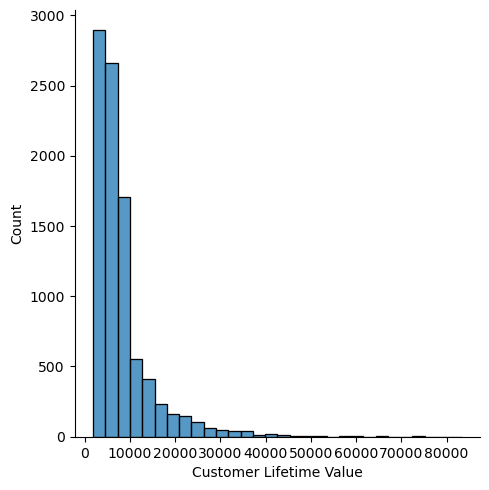

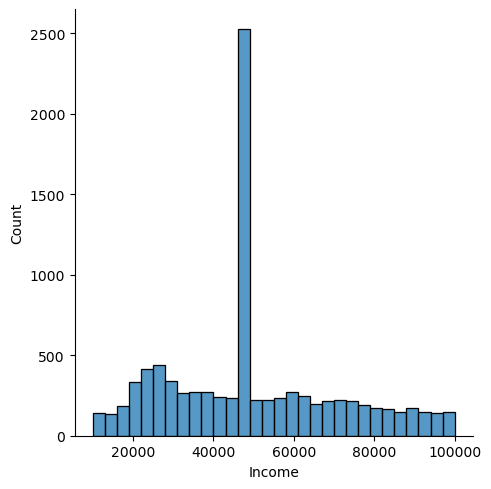

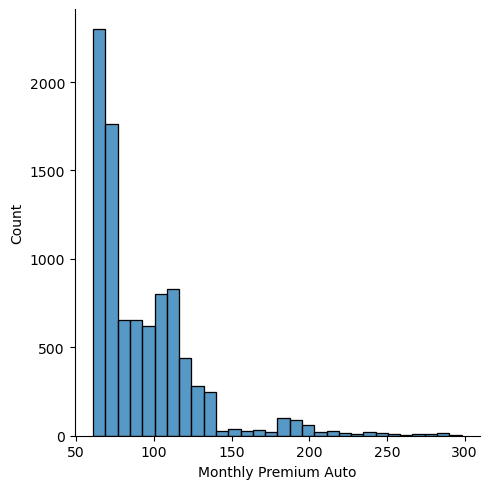

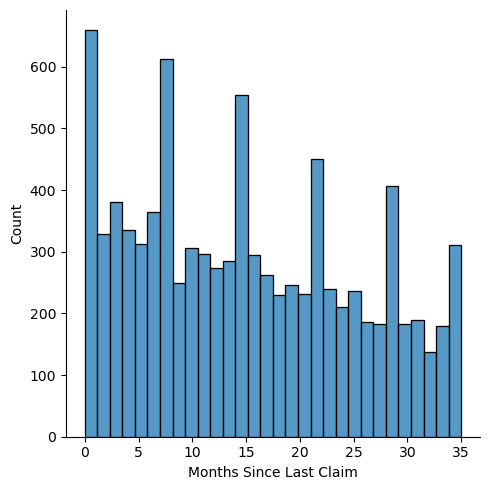

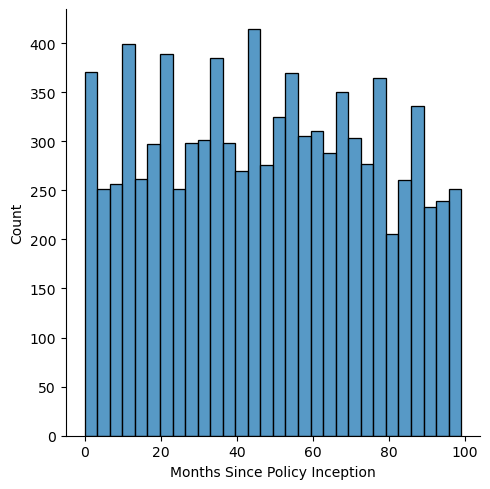

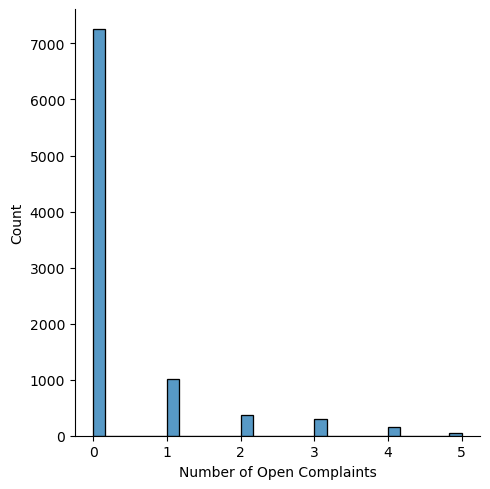

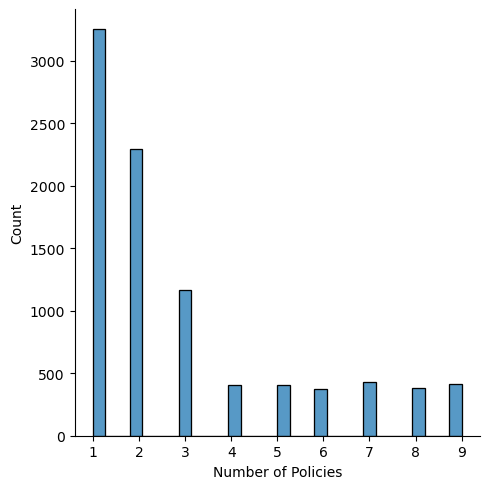

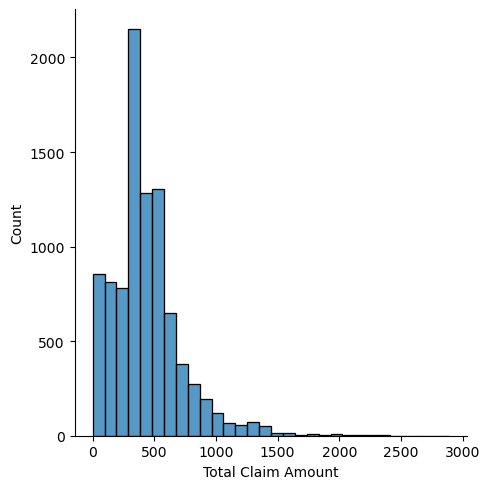

In [10]:
for column in numerical_columns:
    sns.displot(df[column], bins=30)
plt.show()


Text(0, 0.5, 'Frequency')

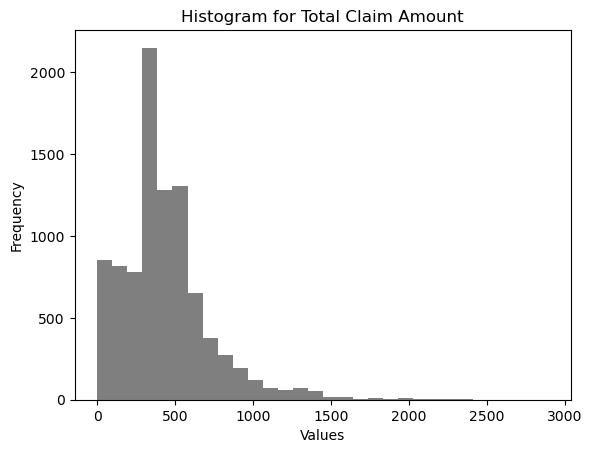

In [11]:
fig, ax = plt.subplots()
for colum in numerical_columns:
    ax.hist(df[column], bins=30)

ax.set_title(f'Histogram for {column}')
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')


Income approaches to a normal distribution


For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

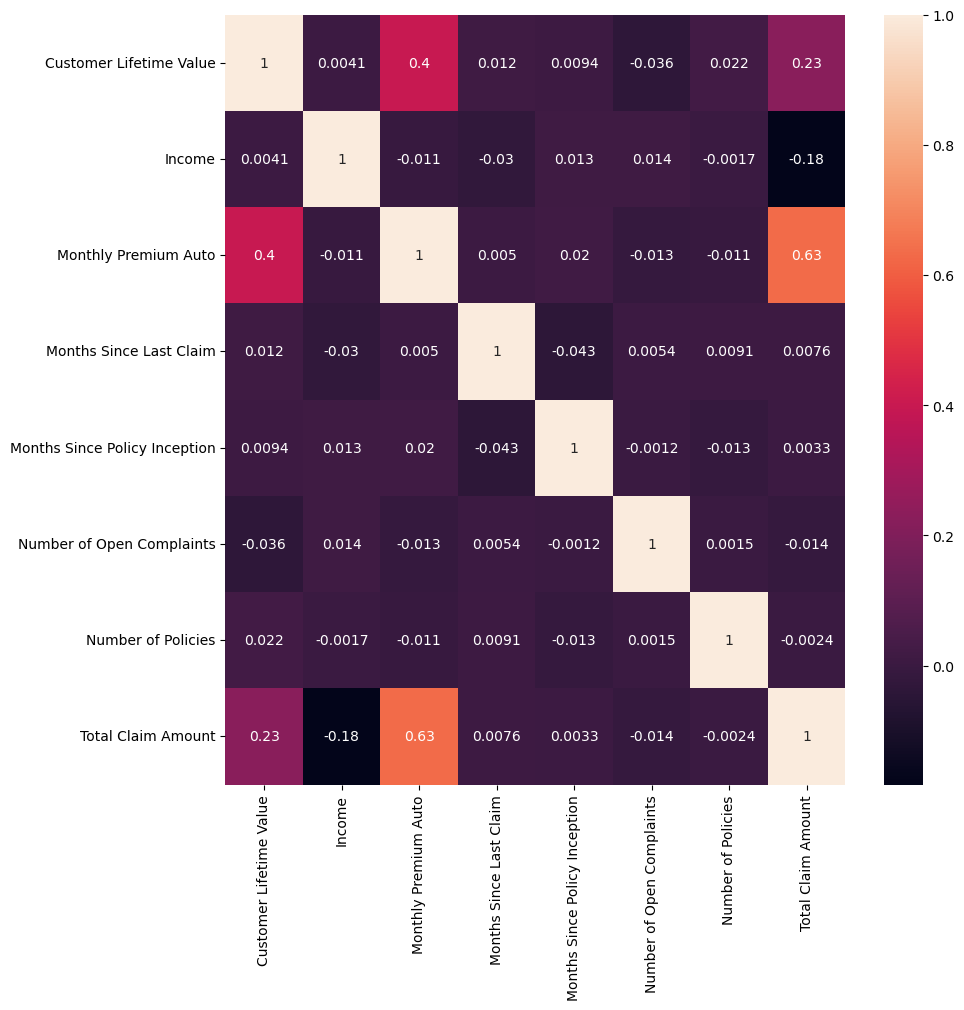

In [12]:
correlations_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlations_matrix, annot=True)

plt.show()

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

There is no variable that srtongly (>0.9) with total claim amounts

In [13]:
#Pseudo-code for doing it without the matrix
#Run all correlations
#Create a loop that check all correlation
#Drop the columns which correlations that are larger than 0.9



LAB 5

- X-y split.
- Normalize (numerical).

In [14]:
cat = numerical_columns #We only want the numerical columns (already filtered)
cat

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,48081,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,48081,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,48081,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [15]:
#According to our data, our interest in the variable we want to predict, should be Costumer Lifetime Value
#1. X-Y
y = cat['Customer Lifetime Value']
X = cat.drop(['Customer Lifetime Value'], axis=1)

#2.Normalize
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
x_normalized
df_norm = pd.DataFrame(x_normalized, columns=X.columns)
df_norm


(9134, 7)


,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.514064,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.422974,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.430601,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.422974,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.375778,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...
9129,0.688250,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,0.128602,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,0.422974,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,0.132349,0.147679,0.971429,0.030303,0.0,0.250,0.238876


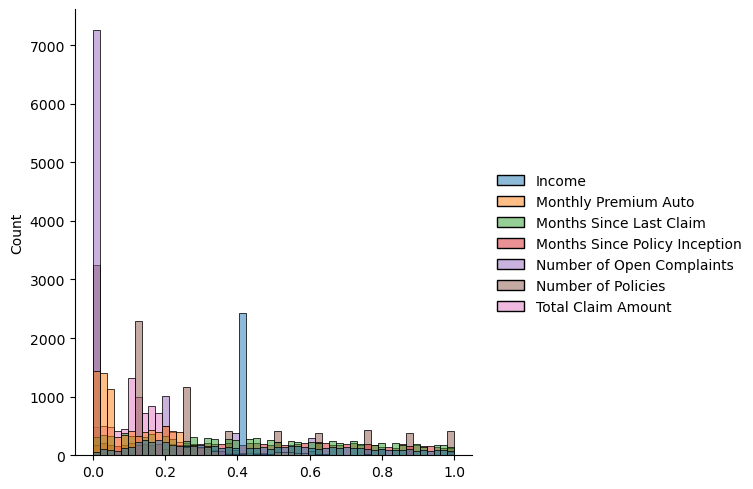

In [16]:
sns.displot(df_norm)
plt.show()

In [17]:
df_norm.corr()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Income,1.000000,-0.011368,-0.030122,0.012926,0.014039,-0.001677,-0.182833
Monthly Premium Auto,-0.011368,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,-0.030122,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.012926,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,0.014039,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,-0.001677,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,-0.182833,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


LAB 6!

- One Hot/Label Encoding (categorical).

In [18]:
categorical_columns = df.select_dtypes(include='object')
categorical_columns.describe()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,BU79786,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [19]:
# Drop costumer ID, there are too many categories, and gives no interesting data for overall analysis and prediction
df_cat = categorical_columns.drop("Customer", axis=1)

In [20]:
df_cat.describe()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [21]:
#One Hot
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder().fit(df_cat) 
encoded = encoder.transform(df_cat).toarray()
unique_values = [encoder.categories_[i] for i in range(len(df_cat.columns))]
#THIS WAS A PAIN TO GET, IS THERE ANY SIMPLIER WAY?
onehot_encoded = pd.DataFrame(encoded, columns=[f"{col}_{value}" for col, values in zip(df_cat.columns, unique_values) for value in values]) 
onehot_encoded

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- Concat DataFrames

In [22]:
#CONCAT WITHOUT NORMALIZING TO HAVE ANOTHER CSV
df_raw = pd.concat([cat, onehot_encoded], axis=1)
df_raw
df_raw.to_csv("all_data_numerical.csv", index=False) 


In [23]:
df_x = pd.concat([df_norm, onehot_encoded], axis=1)
df_x.to_csv("normalized_data_all.csv", index=False) 
df_x


,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.514064,0.033755,0.914286,0.050505,0.0,0.000,0.132974,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.422974,0.139241,0.371429,0.424242,0.0,0.875,0.391051,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.430601,0.198312,0.514286,0.383838,0.0,0.125,0.195764,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.422974,0.189873,0.514286,0.656566,0.0,0.750,0.183117,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.375778,0.050633,0.342857,0.444444,0.0,0.000,0.047710,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.688250,0.050633,0.514286,0.898990,0.0,0.125,0.068485,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,0.128602,0.075949,0.400000,0.282828,0.0,0.000,0.131034,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,0.422974,0.101266,0.257143,0.373737,0.6,0.125,0.273297,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,0.132349,0.147679,0.971429,0.030303,0.0,0.250,0.238876,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- Train-test split.

In [24]:
y = df['Customer Lifetime Value']
X = df_x

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 123)
(1827, 123)
(7307,)
(1827,)


- Apply linear regression.

In [27]:
lm = linear_model.LinearRegression()
lm_transformer = lm.fit(X_train,y_train)
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)



0.17836449429184342

- Model Validation

  - R2.

In [28]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.14133300700520512

 - MSE.

In [29]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

41641054.463662766

  - RMSE.

In [30]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

6452.988025997163

- MAE.

In [31]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

3998.634788697865


# LAB 7

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise.
Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

For the sake of my organisation; new CSV.:

    1. complete_raw.csv (all data modified only income not filtering nor normalised)
    
    2. all_data_numerical.csv (all data in numerical values, not normalised, adn without Customer ID)

    2. normalized_data_all.csv (all the data normalized and categorical into numerical, MODEL RUNS here, with "CONSUMER LIFETIME VALUE AS Y", and without costumer ID)


Check multicollinearity and remove insignificant variables

In [32]:
Lab7 = pd.read_csv('complete_raw.csv')
Lab7

Lab7_numerical= Lab7.select_dtypes(include=[np.number]) #Solo columnas numero
Lab7_numerical.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.00000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,49853.97263,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,21023.08271,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,10037.00000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,34337.00000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,48081.00000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.00000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.00000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


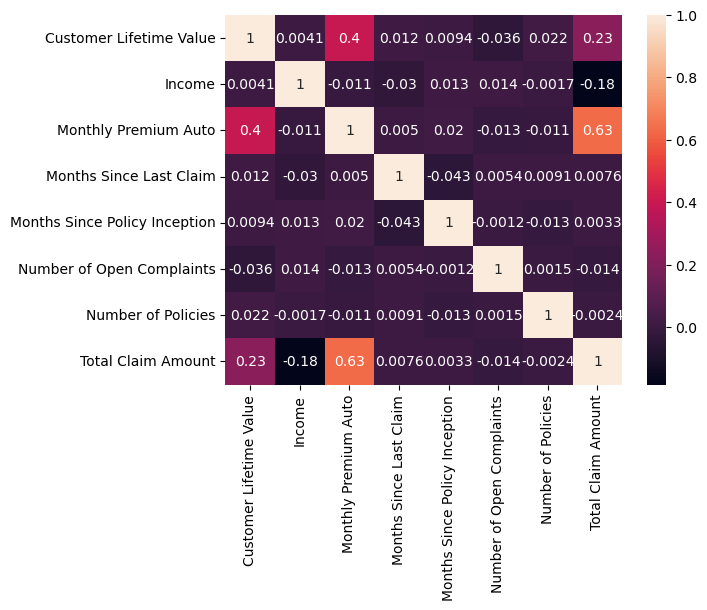

In [33]:
correlation_matrix = Lab7_numerical.corr()
sns.heatmap(correlations_matrix, annot=True)  
plt.show()

In [43]:
#Drop those which correlatio is under 0.2 with any other variable
columns_to_keep = ['Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount']

lab7_x = Lab7_numerical[columns_to_keep]

lab7_x

,Customer Lifetime Value,Monthly Premium Auto,Total Claim Amount
0,2763.519279,69,384.811147
1,6979.535903,94,1131.464935
2,12887.431650,108,566.472247
3,7645.861827,106,529.881344
4,2813.692575,73,138.130879
...,...,...,...
9129,23405.987980,73,198.234764
9130,3096.511217,79,379.200000
9131,8163.890428,85,790.784983
9132,7524.442436,96,691.200000


- use a different method of scaling the numerical variables. As I normalizing was used before, let's use the standard scaler

In [44]:
#Import the file with all numerical data
Lab7_std = pd.read_csv('all_data_numerical.csv')
Lab7_std

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,6979.535903,48081,94,13,42,0,8,1131.464935,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12887.431650,48767,108,18,38,0,2,566.472247,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7645.861827,48081,106,18,65,0,7,529.881344,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2813.692575,43836,73,12,44,0,1,138.130879,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,3096.511217,21604,79,14,28,0,1,379.200000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,8163.890428,48081,85,9,37,3,2,790.784983,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,7524.442436,21941,96,34,3,0,3,691.200000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(Lab7_std)
x_standardized = transformer.transform(Lab7_std)
print(x_standardized.shape)
Lab7_standarizado =pd.DataFrame(x_standardized, columns=Lab7_std.columns)
Lab7_standarizado

(9134, 124)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,-0.762878,0.305397,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-0.169640,-0.478722,-0.725537,...,-0.411917,-1.011895,-0.134795,-0.143383,-0.494726,-0.236545,1.960371,-0.339904,0.649504,-0.489233
1,-0.149245,-0.084339,0.022691,-0.208186,-0.217334,-0.422250,2.106160,2.400737,2.088894,-0.725537,...,-0.411917,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,-0.339904,0.649504,-0.489233
2,0.710636,-0.051707,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.455734,-0.478722,-0.725537,...,-0.411917,-1.011895,-0.134795,-0.143383,-0.494726,-0.236545,1.960371,-0.339904,0.649504,-0.489233
3,-0.052263,-0.084339,0.371467,0.288205,0.606907,-0.422250,1.687759,0.329769,-0.478722,1.378290,...,-0.411917,-1.011895,-0.134795,-0.143383,2.021323,-0.236545,-0.510108,-0.339904,0.649504,-0.489233
4,-0.755575,-0.286271,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843,-0.478722,-0.725537,...,-0.411917,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,-0.339904,0.649504,-0.489233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.241590,1.050666,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934,-0.478722,1.378290,...,2.427671,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,-0.339904,0.649504,-0.489233
9130,-0.714411,-1.343833,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956,-0.478722,1.378290,...,-0.411917,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,-0.339904,0.649504,-0.489233
9131,0.023135,-0.084339,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937,-0.478722,1.378290,...,-0.411917,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,-0.339904,0.649504,-0.489233
9132,-0.069935,-1.327802,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113,-0.478722,1.378290,...,-0.411917,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,2.942005,-1.539636,-0.489233


- use a different ratio of train test split

In [ ]:
#I'll use a new train test split, with the standard scaler and Total claim amount as Y. Two tests, one with 0.2 ratio, and one with 0.5

In [51]:
y = Lab7_std['Total Claim Amount']
X = Lab7_standarizado.drop(['Total Claim Amount'], axis=1)

In [52]:
lm.fit(X,y)
print("b0 = " , lm.intercept_)
print("b1 = " , lm.coef_)

b0 =  434.00865561669195
b1 =  [-6.83602707e-01 -4.89165859e+00  1.78952918e+02  3.32769936e+00
 -2.42869609e-01 -1.32996438e+00  1.30235793e+00  4.22705030e+14
  5.15890500e+14  3.20568144e+14  4.89815999e+14  3.06469147e+14
 -3.02197175e+12 -3.02197175e+12 -1.97958372e+13 -1.85988332e+13
 -1.16251271e+13  1.44838143e+14  1.43810092e+14  5.99538420e+13
  1.42867573e+14  8.62239355e+13  1.92658722e+13  2.20564892e+13
  2.03833919e+13  1.77981176e+13  1.90727933e+13  1.95201401e+13
  1.95831556e+13  1.88776066e+13  2.12089617e+13  1.96459548e+13
  2.11511469e+13  2.00183203e+13  2.08006018e+13  2.00183203e+13
  1.84806422e+13  1.97085397e+13  1.92017428e+13  1.94569062e+13
  2.12666063e+13  2.20010919e+13  2.05633141e+13  2.00183203e+13
  2.10931604e+13  1.90727933e+13  2.10931604e+13  1.70138549e+13
  2.04435556e+13  1.89429070e+13  1.94569062e+13  1.93297744e+13
  1.91373840e+13  1.96459548e+13  2.00796613e+13  1.94569062e+13
  1.97709123e+13  1.86802462e+13  2.15523222e+13  1.8074405

In [54]:
from sklearn.model_selection import train_test_split
#IMPORTANTE: y tiene que ser la original, previa a la union de datos

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Acuerdate de definir X e y
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 123)
(1827, 123)
(7307,)
(1827,)


In [56]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7806713258770354

In [57]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.744422295824411

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) #Acuerdate de definir X e y
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4567, 123)
(4567, 123)
(4567,)
(4567,)


In [65]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7786108904881234

In [66]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7635026778341664

- use the transformation on numerical columns which align it more towards a normal distribution

In [ ]:
#Raw data sat, get only numerical value, normalise them, quit outlayers and graphic representation

In [67]:
Lab7 = pd.read_csv('complete_raw.csv')
Lab7

Lab7_numerical= Lab7.select_dtypes(include=[np.number]) #Solo columnas numero
Lab7_numerical.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.00000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,49853.97263,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,21023.08271,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,10037.00000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,34337.00000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,48081.00000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.00000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.00000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [74]:
Z = Lab7_numerical

MinMaxtransformer = MinMaxScaler().fit(Lab7_numerical) #IMPORTANTE ESTO ES EL NOMBRE DEL TRANSFORMADOR
transformer2 = MinMaxScaler().fit (Z) #Aplicar el min y el max, pero recuerda que X  tiene que ser valores numericos
x_normalized = transformer.transform(Z) #Convertirlo entre 0 y 1 
print(x_normalized.shape)
x_normalized
df_normalizado = pd.DataFrame(x_normalized, columns=Z.columns) #df.normalizado para asi poder tener un data set normalizado al que llamar
df_normalizado

(9134, 8)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.514064,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.422974,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.430601,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.422974,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.375778,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...,...
9129,0.264137,0.688250,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,0.014719,0.128602,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,0.076951,0.422974,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,0.069098,0.132349,0.147679,0.971429,0.030303,0.0,0.250,0.238876


Costumer Lifetime Value

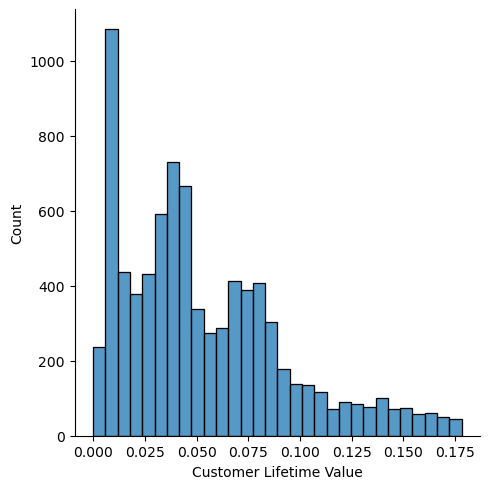

In [77]:
iqr = np.percentile(df_normalizado['Customer Lifetime Value'],75) - np.percentile(df_normalizado['Customer Lifetime Value'],25) #Calcular el 25% inferior y 75%

upper_limit = np.percentile(df_normalizado['Customer Lifetime Value'],75) + 1.5*iqr #definir upper_limit
lower_limit = np.percentile(df_normalizado['Customer Lifetime Value'],25) - 1.5*iqr #definir lower_limit

df_2 = df_normalizado[(df_normalizado['Customer Lifetime Value']>lower_limit) & (df_normalizado['Customer Lifetime Value']<upper_limit)].copy() #Crear data set sin outlayers
sns.displot(df_2["Customer Lifetime Value"], bins=30) 
plt.show()

Income

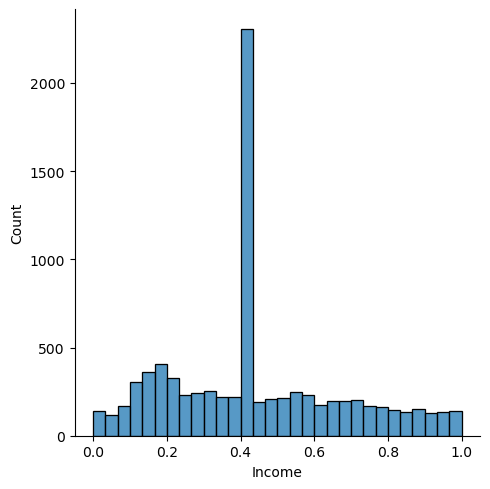

In [78]:
iqr = np.percentile(df_2['Income'],75) - np.percentile(df_2['Income'],25) #Calcular el 25% inferior y 75%

upper_limit = np.percentile(df_2['Income'],75) + 1.5*iqr #definir upper_limit
lower_limit = np.percentile(df_2['Income'],25) - 1.5*iqr #definir lower_limit

df_3 = df_2[(df_2['Income']>lower_limit) & (df_2['Income']<upper_limit)].copy() #Crear data set sin outlayers
sns.displot(df_3["Income"], bins=30) 
plt.show()

Monthly Premium Auto

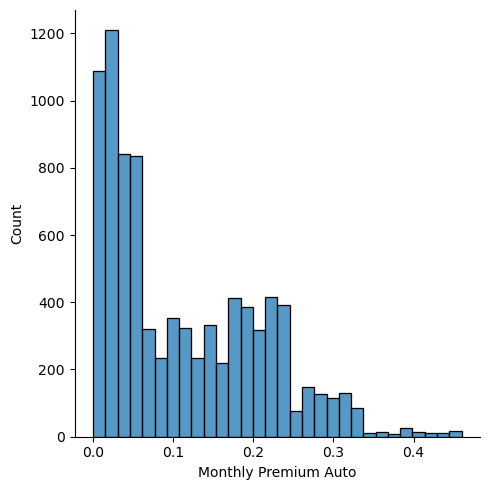

In [79]:
iqr = np.percentile(df_normalizado['Monthly Premium Auto'],75) - np.percentile(df_normalizado['Monthly Premium Auto'],25) #Calcular el 25% inferior y 75%

upper_limit = np.percentile(df_normalizado['Monthly Premium Auto'],75) + 1.5*iqr #definir upper_limit
lower_limit = np.percentile(df_normalizado['Monthly Premium Auto'],25) - 1.5*iqr #definir lower_limit

df_2 = df_normalizado[(df_normalizado['Monthly Premium Auto']>lower_limit) & (df_normalizado['Monthly Premium Auto']<upper_limit)].copy() #Crear data set sin outlayers
sns.displot(df_2["Monthly Premium Auto"], bins=30) 